In [3]:
import numpy as np
import pandas as pd
import glob

In [39]:
pwd

u'/Users/talithaford/Dropbox/Conference-Workshop/ResBaz/2016/psychopy_lesson'

In [73]:
data_lst = glob.glob('data/*2016_Feb_02_*.csv')

In [74]:
data_lst


['data/tf1_visneuro_2016_Feb_02_1234.csv',
 'data/tf_visneuro_2016_Feb_02_1218.csv',
 'data/tf_visneuro_2016_Feb_02_1233.csv']

In [55]:
for i in data_lst:
    data = pd.read_csv(i).dropna(axis=1)
    print data.shape

(50, 15)


In [82]:
data_lst = glob.glob('data/*2016_Feb_02_*.csv')
frame = pd.DataFrame()
all_data = []
for data in data_lst:
    df = pd.read_csv(data,index_col=None, header=0).dropna(axis=1)
    if not df.shape == (50,15):
        continue
    print df.shape
    all_data.append(df)
    
frame = pd.concat(all_data).reset_index().drop('index', axis = 1)
if list(frame.columns) == ['correct_ans',
 'images',
 'type_of_image',
 'loop.thisRepN',
 'loop.thisTrialN',
 'loop.thisN',
 'loop.thisIndex',
 'key_resp.keys',
 'key_resp.corr',
 'key_resp.rt',
 'date',
 'frameRate',
 'expName',
 'session',
 'participant']


(50, 15)
(50, 15)
(50, 15)


In [84]:
frame.columns = ['correct_ans',
 'images',
 'type_of_image',
 'loop.thisRepN',
 'loop.thisTrialN',
 'loop.thisN',
 'loop.thisIndex',
 'key_resp.keys',
 'key_resp.corr',
 'key_resp.rt',
 'date',
 'frameRate',
 'expName',
 'session',
 'participant']

['correct_ans',
 'images',
 'type_of_image',
 'loop.thisRepN',
 'loop.thisTrialN',
 'loop.thisN',
 'loop.thisIndex',
 'key_resp.keys',
 'key_resp.corr',
 'key_resp.rt',
 'date',
 'frameRate',
 'expName',
 'session',
 'participant']

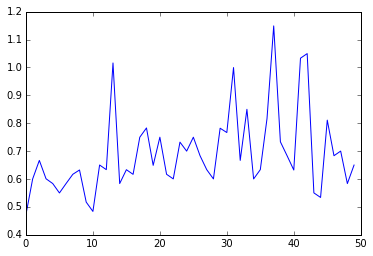